In [1]:
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

In [2]:
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

--2024-03-17 12:59:58--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>] 100.13M   171MB/s    in 0.6s    

2024-03-17 12:59:59 (171 MB/s) - ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’ saved [104996770/104996770]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py37h06a4308_2
    - cffi==1.15.0=py37hd667e15_1
    

In [3]:
!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
!python -m pip install pandas
!rm $MINICONDA_INSTALLER_SCRIPT
import sys

  Cloning https://github.com/ersilia-os/ersilia.git to /tmp/pip-req-build-5r104z5x
  Running command git clone -q https://github.com/ersilia-os/ersilia.git /tmp/pip-req-build-5r104z5x
  Resolved https://github.com/ersilia-os/ersilia.git to commit ccb1b6a40db9ecb00611a11f5568fbcc256a3bb8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 78 kB 3.2 MB/s 
     |████████████████████████████████| 97 kB 6.4 MB/s 
     |████████████████████████████████| 9.9 MB 46.8 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 421 kB 65.5 MB/s 
     |████████████████████████████████| 670 kB 52.7 MB/s 
     |████████████████████████████████| 4.3 MB 66.4 MB/s 
     |████████████████████████████████| 58 kB 6.0 MB/s 
     |████████████████████████████████| 148 kB 53.2 MB/s 
     |████████████████████████████████| 139 kB 39.8 MB/s 
     |████████

In [4]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [5]:
## Mount google drive
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
# specify your input folder

input_folder = "/content/gdrive/MyDrive/Ersilia"  # @param {type:"string"}

In [7]:
# specify your output folder

output_folder = "/content/gdrive/MyDrive/Ersilia"  # @param {type:"string"}

In [8]:
# specify the name of your input csv file

input_filename = "reference_library"  # @param {type:"string"}

In [9]:
# specify the SMILES column name
smiles_column = "smiles"  # @param {type:"string"}

In [10]:
!find "/content/gdrive/MyDrive/Ersilia/" -name "reference_library.csv"

/content/gdrive/MyDrive/Ersilia/reference_library.csv


In [11]:
# @title 🔤 Extract SMILES to a list
import pandas as pd

path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")

My dataset contains 1000 SMILES


In [33]:
#checking if smiles is standardized and valid

from rdkit import Chem
def is_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return False
        return True
    except:
        return False

# Example usage
smiles = "CCO"
if is_smiles(smiles):
    print("Valid SMILES")
else:
    print("Not a valid SMILES")

Valid SMILES


In [12]:
# Enter the model name
# This is just an example, make sure to adapt it to your specific model

model_name = "eos6oli"  # @param {type:"string"}

In [13]:
# @title 📥 Fetch the model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
  Running command git clone -q https://github.com/ersilia-os/bentoml-ersilia.git /tmp/pip-req-build-zcx1idki
Solving environment: / failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/eosbase-bentoml-0.11.0-py37

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2023.12.12 |       h06a430

In [14]:
# @title ⚙️ Serve the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:41509
   PID: 4170
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


In [15]:
# @title ⚡ Run predictions
api = "calculate"  # @param {type:"string"}

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 63.07 seconds


In [16]:
# @title ✔️ Check your results

print(output.head())

                           key  \
0  SUTWUYBMBWPLMW-MDWZMJQESA-N   
1  RIYHJWOTNJXDLV-UHFFFAOYSA-N   
2  OGNBARHGQVMGGX-UHFFFAOYSA-N   
3  WQEXDIRUOYNDCM-UHFFFAOYSA-N   
4  YEGVLLQDOGYWDQ-OAHLLOKOSA-N   

                                               input  solubility  
0                       CCCCNC(=S)N/N=C/C1=C(C)C=CS1      -3.454  
1         CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1      -4.502  
2           O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl      -2.900  
3  O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...      -4.777  
4  CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...      -4.473  


In [17]:
# @title 💾 Save your results in Google Drive

output_path = "%s/%s_output.csv" % (output_folder, model_name)
output.to_csv(output_path, index=False)

In [23]:
#Put output into a DataFrame

df = pd.DataFrame(output, columns=['key', 'input', 'solubility'])
df.head()

,key,input,solubility
0,SUTWUYBMBWPLMW-MDWZMJQESA-N,CCCCNC(=S)N/N=C/C1=C(C)C=CS1,-3.454
1,RIYHJWOTNJXDLV-UHFFFAOYSA-N,CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1,-4.502
2,OGNBARHGQVMGGX-UHFFFAOYSA-N,O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl,-2.900
3,WQEXDIRUOYNDCM-UHFFFAOYSA-N,O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...,-4.777
4,YEGVLLQDOGYWDQ-OAHLLOKOSA-N,CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...,-4.473


# Plotting Histogram with Output from Predictions

In [26]:
#Import seaborn library for visualization

import seaborn as sns

<Axes: xlabel='solubility', ylabel='Count'>

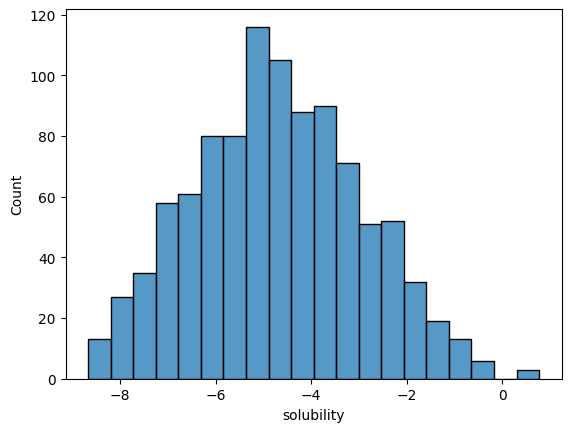

In [31]:
#Plot histogram with solubility column in the DataFrame

sns.histplot(data=df, x='solubility')

Predictions shows negative solubility values, We have more smiles that falls between the solubility values of (-4) and (-6). This may be because some of the SMILES strings are less soluble.

The model may have also been biased as a result of many factors such as:
1.The model not well trained with diverse compounds
2.Model features does not accurately capture certain chemical properties in the compound.
